In [122]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [123]:
from lib.Stream import Stream
from lib.TimeNode import TimeNode, TimeNodeSet
from lib.StreamProperties import StreamStarSat
from lib.Graph import Graph, StarSat, BHACore
from lib.patterns import *
import networkx as nx
import matplotlib.pyplot as plt
import logging
import StreamFig
from IPython.display import Image, clear_output

Faire des minidonnées de test, calculer l'intérieur (pour des propriétés de degrés genre hub-autorité etc.)

In [124]:
basename = "ChangingNeighbours-StSa-Copy1"

s = Stream(lang=set("abcd"), _loglevel=logging.DEBUG)
core_property = StreamStarSat(s, threshold=3)
s.setCoreProperty(core_property)
# s.readStream("./tests/integration/fixtures/ChangingNeighbours-StSa-Copy1.json")
s.readStream(f"./tests/integration/fixtures/{basename}.json")

s.T

{'alpha': 0, 'omega': 10}

In [125]:
I = set()
for l in s.E:
    I = I.union(l["label_u"])
    I = I.union(l["label_v"])
s.I = I
s.I

{'a', 'b', 'c', 'd'}

In [126]:
X1 = [TimeNode(x["u"], x["b"], x["e"]) for x in s.E ]
X2 = [TimeNode(x["v"], x["b"], x["e"]) for x in s.E ]

X = X1 + X2
X = TimeNodeSet(elements=X)
s.W = X
interior = interior(s, X, X)
print(interior)

AttributeError: 'StreamStarSat' object has no attribute 'substream'

In [118]:
prop = StreamStarSat(s)

AttributeError: 'StreamStarSat' object has no attribute 'get_stars_sats'

In [83]:
# Draw
s_draw = StreamFig.StreamFig(alpha=0, omega=10, streaming=False)
_ = [s_draw.addNode(x) for x in s.nodes()]
for l in s.E:
    if set([l["u"], l["v"]]) == set(["v", "y"]):
        s_draw.addLink(l["u"], l["v"], l["b"], l["e"], curving=0.2)
    else:
        s_draw.addLink(l["u"], l["v"], l["b"], l["e"])
    
    
# draw star
for nc in interior[0].values():
    s_draw.addNodeCluster(nc.node, [(nc.b, nc.e)], color=11)
# draw sat
for nc in interior[1].values():
    s_draw.addNodeCluster(nc.node, [(nc.b, nc.e)], color=12)
    
s_draw.addTimeLine(ticks=2)
s_draw.save(f"{basename}.fig")
# For display
del s_draw
from subprocess import call
call(f"rm {basename}.png", shell=True)
call(f"fig2dev -Lpng {basename}.fig > {basename}.png", shell=True)
clear_output()

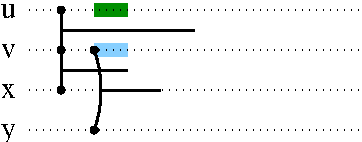

In [84]:
Image(f"{basename}.png")

In [60]:
s.bipatterns(X, X)

 set() ({92270 [0, 2], 0ef32090550901ead25cb0ea21c4d36b [0, 2], 0ef32090550901ead25cb0ea21c4d36b [6, 8], 908708 [6, 8]}, {92270 [0, 2], 0ef32090550901ead25cb0ea21c4d36b [0, 2], 0ef32090550901ead25cb0ea21c4d36b [6, 8], 908708 [6, 8]})


In [10]:
s = Stream(lang=set("abcd"), _loglevel=logging.DEBUG)
core_property = StreamStarSat(s, threshold=2)
s.setCoreProperty(core_property)
s.readStream("./tests/integration/fixtures/testJaccard.json")

def jaccard(s, u, v):
    """ 
        u,v : two nodes
        
        @return: the Jaccard coefficient of u and v
    """
    jaccard = 0.0
    
    n_u = TimeNodeSet(elements=[ TimeNode(x, b, e) for x in s.neighbours(u) for b,e,l_u,l_v in s.times[frozenset([u, x])] ])
    n_v = TimeNodeSet(elements=[ TimeNode(x, b, e) for x in s.neighbours(v) for b,e,l_u,l_v in s.times[frozenset([v, x])] ])
    
    # Union
    union = sum(( x.e - x.b for x in n_u.union(n_v) ))
    
    # Intersection
    inter = sum( ( x.e - x.b for x in n_u.intersection(n_v) ) )
    
    return inter / union

jaccard(s, "v", "x")

0.25